In [3]:
%run -m ipy_startup
%matplotlib inline

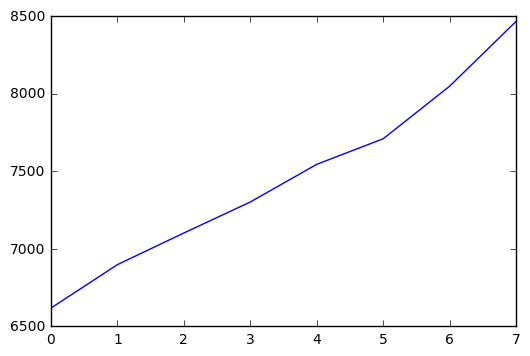

In [10]:
x = pd.Series([6619,6899,7103,7303,7546,7711,8050,8468])
x.plot()

In [11]:
x.pct_change()

0         NaN
1    0.042302
2    0.029570
3    0.028157
4    0.033274
5    0.021866
6    0.043963
7    0.051925
dtype: float64